In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

import umap.umap_ as UMAP 
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import plotly.express as px
from sklearn.datasets import make_blobs

In [8]:
centers = [ [ 2, -6, -6],[-1,  9,  4],[-8,  7,  2],[ 4,  7,  9] ]
cluster_std=[1,1,2,3.5]
x,labels_=make_blobs(n_samples=500,centers=centers,n_features=3,cluster_std=cluster_std,random_state=42)

In [9]:
x

array([[ 3.78092405,  4.36112394,  8.01763723],
       [-7.58323438,  2.91653026,  1.50564523],
       [ 2.95852774, 11.81497385,  8.47480545],
       ...,
       [ 3.45353408, -6.26465683, -3.27983083],
       [ 1.0754008 ,  9.8711247 ,  3.67397647],
       [ 0.64496771,  8.75096396,  4.57655696]])

In [10]:
labels_

array([3, 2, 3, 2, 1, 1, 0, 1, 3, 0, 1, 1, 0, 3, 2, 1, 0, 0, 2, 3, 3, 2,
       2, 3, 0, 2, 1, 2, 3, 0, 2, 1, 3, 1, 2, 2, 2, 3, 0, 1, 1, 3, 1, 2,
       1, 0, 2, 3, 1, 0, 3, 1, 0, 1, 1, 3, 1, 2, 2, 2, 3, 2, 3, 0, 3, 2,
       2, 3, 2, 0, 1, 3, 0, 1, 0, 1, 2, 1, 2, 2, 3, 2, 1, 0, 1, 1, 1, 2,
       0, 3, 0, 1, 1, 3, 2, 3, 2, 0, 3, 0, 1, 0, 1, 1, 1, 0, 0, 2, 2, 0,
       2, 3, 0, 1, 1, 0, 0, 3, 1, 1, 2, 0, 0, 2, 1, 3, 2, 0, 3, 1, 3, 2,
       3, 2, 1, 3, 3, 1, 3, 0, 0, 2, 1, 0, 1, 2, 2, 2, 2, 1, 3, 0, 2, 1,
       2, 0, 1, 2, 0, 3, 2, 2, 2, 2, 3, 1, 2, 0, 1, 0, 0, 0, 1, 2, 2, 2,
       1, 1, 2, 0, 3, 2, 3, 2, 3, 0, 0, 1, 3, 2, 1, 1, 3, 3, 2, 2, 3, 0,
       1, 1, 1, 0, 1, 3, 1, 2, 2, 0, 1, 1, 3, 2, 2, 3, 1, 2, 2, 2, 0, 3,
       0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 3, 0, 2, 0, 0, 0, 1, 0, 3, 3,
       3, 0, 3, 1, 0, 2, 2, 1, 3, 2, 0, 2, 1, 3, 3, 0, 0, 3, 3, 1, 0, 1,
       3, 0, 0, 0, 1, 0, 3, 2, 2, 1, 3, 0, 2, 2, 1, 0, 0, 3, 3, 2, 2, 0,
       2, 0, 1, 3, 0, 3, 2, 0, 3, 1, 2, 1, 0, 3, 0,

In [11]:
df=pd.DataFrame(x,columns=['x','y','z'])

In [12]:
df

,x,y,z
0,3.780924,4.361124,8.017637
1,-7.583234,2.916530,1.505645
2,2.958528,11.814974,8.474805
3,-6.581992,6.820529,4.880234
4,-1.573662,8.453141,3.967247
...,...,...,...
495,-7.501233,10.154907,1.809409
496,1.543029,4.679847,4.090882
497,3.453534,-6.264657,-3.279831
498,1.075401,9.871125,3.673976


## Interactive 3d plot(TRY IT!!!)

In [56]:
import plotly.express as px
plt.figure(figsize=(10,6))
fig=px.scatter_3d(df,x='x',y='y',z='z',color=labels_.astype(str),opacity=0.7,color_discrete_sequence=px.colors.qualitative.G10,title='3D plot of the 4 clusturs')
fig.update_traces(marker=dict(size=5, line=dict(width=1, color='black')), showlegend=False)
fig.update_layout(coloraxis_showscale=False, width=1000, height=800)
fig.show()

<Figure size 1000x600 with 0 Axes>

In [25]:
scaler=StandardScaler()

In [29]:
x_scaled=scaler.fit_transform(x)

In [30]:
x_scaled

array([[ 0.82962036,  0.01649615,  0.97252647],
       [-1.39042643, -0.20878892, -0.14816274],
       [ 0.66896101,  1.1789276 ,  1.05120339],
       ...,
       [ 0.76566304, -1.64059942, -0.97172508],
       [ 0.30108248,  0.8757834 ,  0.22499887],
       [ 0.21699516,  0.7010938 ,  0.38032956]])

In [37]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,random_state=42,perplexity=40,max_iter=1000)

In [33]:
tsne

TSNE(max_iter=100, n_components=500, perplexity=40, random_state=42)

In [39]:
x_tsne=tsne.fit_transform(x_scaled)

In [40]:
x_tsne

array([[ 5.35082722e+00,  1.44174223e+01],
       [ 4.52751493e+00, -1.80031261e+01],
       [ 9.11634064e+00,  1.51186800e+01],
       [-1.31826270e+00, -1.70267887e+01],
       [ 9.03014946e+00, -1.52807736e+00],
       [ 9.02118015e+00, -2.01013684e+00],
       [-3.54068451e+01,  3.89229250e+00],
       [ 1.03645306e+01, -4.01702851e-01],
       [ 3.37071395e+00,  2.02533150e+01],
       [-3.56821785e+01,  4.77770150e-01],
       [ 1.44075966e+01,  4.79390830e-01],
       [ 1.29337492e+01,  4.49317646e+00],
       [-4.22727547e+01,  2.66278577e+00],
       [ 6.38985729e+00,  1.59668512e+01],
       [-3.40979129e-01, -1.76332378e+01],
       [ 1.40307732e+01,  5.02125502e+00],
       [-3.92045097e+01,  2.48403955e+00],
       [-3.94110146e+01,  1.55651820e+00],
       [-1.64484930e+00, -2.23058605e+01],
       [ 3.68123651e+00,  1.95255795e+01],
       [ 1.16252623e+01,  1.54673500e+01],
       [ 9.84390080e-01, -2.18216858e+01],
       [ 2.25999260e+00, -1.99738369e+01],
       [ 4.

In [42]:
labels_


array([3, 2, 3, 2, 1, 1, 0, 1, 3, 0, 1, 1, 0, 3, 2, 1, 0, 0, 2, 3, 3, 2,
       2, 3, 0, 2, 1, 2, 3, 0, 2, 1, 3, 1, 2, 2, 2, 3, 0, 1, 1, 3, 1, 2,
       1, 0, 2, 3, 1, 0, 3, 1, 0, 1, 1, 3, 1, 2, 2, 2, 3, 2, 3, 0, 3, 2,
       2, 3, 2, 0, 1, 3, 0, 1, 0, 1, 2, 1, 2, 2, 3, 2, 1, 0, 1, 1, 1, 2,
       0, 3, 0, 1, 1, 3, 2, 3, 2, 0, 3, 0, 1, 0, 1, 1, 1, 0, 0, 2, 2, 0,
       2, 3, 0, 1, 1, 0, 0, 3, 1, 1, 2, 0, 0, 2, 1, 3, 2, 0, 3, 1, 3, 2,
       3, 2, 1, 3, 3, 1, 3, 0, 0, 2, 1, 0, 1, 2, 2, 2, 2, 1, 3, 0, 2, 1,
       2, 0, 1, 2, 0, 3, 2, 2, 2, 2, 3, 1, 2, 0, 1, 0, 0, 0, 1, 2, 2, 2,
       1, 1, 2, 0, 3, 2, 3, 2, 3, 0, 0, 1, 3, 2, 1, 1, 3, 3, 2, 2, 3, 0,
       1, 1, 1, 0, 1, 3, 1, 2, 2, 0, 1, 1, 3, 2, 2, 3, 1, 2, 2, 2, 0, 3,
       0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 3, 0, 2, 0, 0, 0, 1, 0, 3, 3,
       3, 0, 3, 1, 0, 2, 2, 1, 3, 2, 0, 2, 1, 3, 3, 0, 0, 3, 3, 1, 0, 1,
       3, 0, 0, 0, 1, 0, 3, 2, 2, 1, 3, 0, 2, 2, 1, 0, 0, 3, 3, 2, 2, 0,
       2, 0, 1, 3, 0, 3, 2, 0, 3, 1, 2, 1, 0, 3, 0,

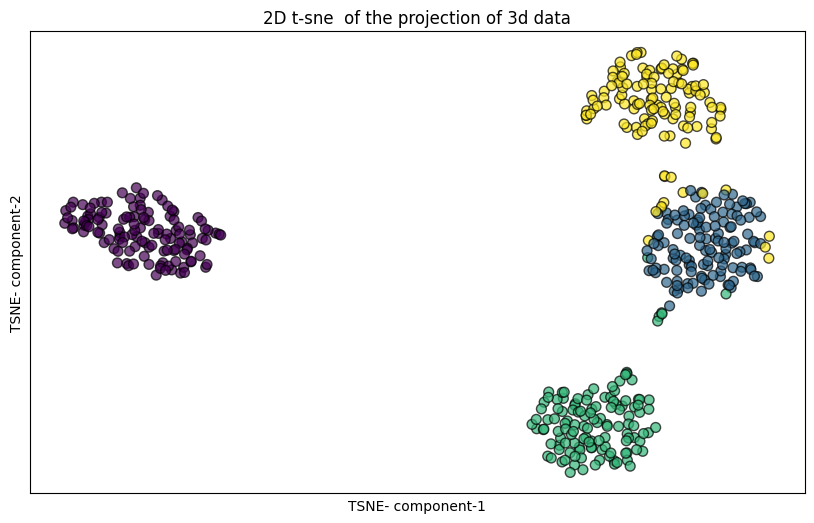

In [54]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(1,1,1)
ax.scatter(x_tsne[:,0],x_tsne[:,1],c=labels_,cmap='viridis',s=50,alpha=0.7,edgecolor='k')
ax.set_title("2D t-sne  of the projection of 3d data")
ax.set_xlabel('TSNE- component-1')
ax.set_ylabel('TSNE- component-2')
ax.set_xticks([])
ax.set_yticks([])
plt.show()